# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: NNDL </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Project1 - Question1 </h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Reza Alavi- sid:810100251 </h1>

</div>
   

</html>

# <div style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; color: #333; background-color: #d0e7ff; padding: 10px; border-radius: 8px;">Part 1</div>


100%|██████████| 26.4M/26.4M [00:02<00:00, 13.1MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 213kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.94MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.96MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/20], Loss: 0.4451
Epoch [2/20], Loss: 0.6632
Epoch [3/20], Loss: 0.3724
Epoch [4/20], Loss: 0.2116
Epoch [5/20], Loss: 0.2831
Epoch [6/20], Loss: 0.0832
Epoch [7/20], Loss: 0.2410
Epoch [8/20], Loss: 0.3850
Epoch [9/20], Loss: 0.4201
Epoch [10/20], Loss: 0.3472
Epoch [11/20], Loss: 0.2758
Epoch [12/20], Loss: 0.3945
Epoch [13/20], Loss: 0.1725
Epoch [14/20], Loss: 0.3223
Epoch [15/20], Loss: 0.2070
Epoch [16/20], Loss: 0.1021
Epoch [17/20], Loss: 0.3634
Epoch [18/20], Loss: 0.3111
Epoch [19/20], Loss: 0.2063
Epoch [20/20], Loss: 0.2216


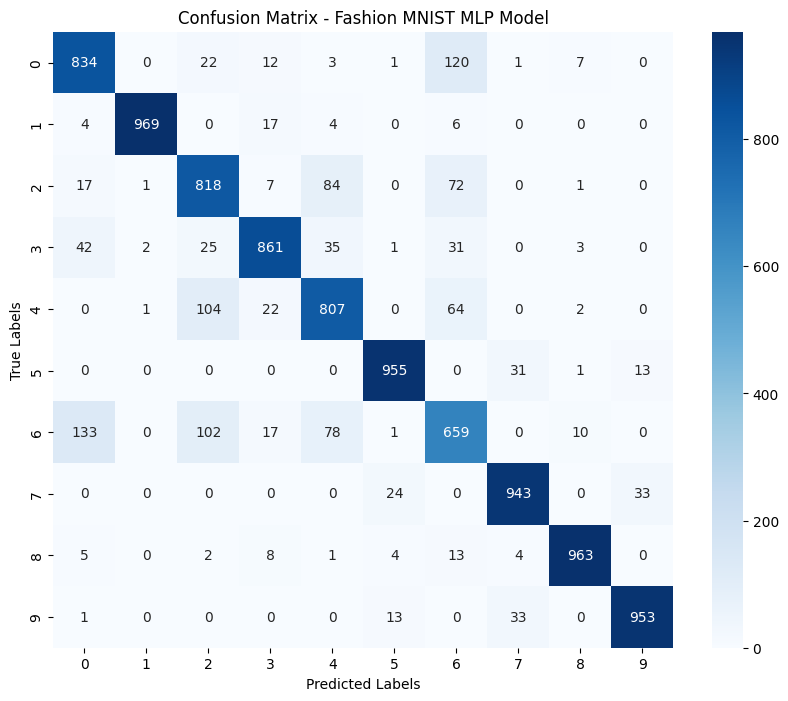

Class 0 is most commonly confused with class 6
Class 1 is most commonly confused with class 3
Class 2 is most commonly confused with class 4
Class 3 is most commonly confused with class 0
Class 4 is most commonly confused with class 2
Class 5 is most commonly confused with class 7
Class 6 is most commonly confused with class 0
Class 7 is most commonly confused with class 9
Class 8 is most commonly confused with class 6
Class 9 is most commonly confused with class 7
The two classes most frequently confused with each other are 0 and 6


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

batch_size = 64
learning_rate = 0.001
num_epochs = 20
dropout_rate = 0.3
l2_lambda = 0.0001

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(28*28, 100)
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.hidden(x))
        x = self.dropout(x)
        x = self.output(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

conf_mat = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Fashion MNIST MLP Model')
plt.show()

most_confused_with = {}
for i in range(10):
    row = conf_mat[i, :]
    row[i] = 0
    most_confused_class = np.argmax(row)
    most_confused_with[i] = most_confused_class
    print(f"Class {i} is most commonly confused with class {most_confused_class}")

max_confusion = 0
most_confused_pair = (None, None)
for i in range(10):
    for j in range(i+1, 10):
        if conf_mat[i, j] + conf_mat[j, i] > max_confusion:
            max_confusion = conf_mat[i, j] + conf_mat[j, i]
            most_confused_pair = (i, j)
print(f"The two classes most frequently confused with each other are {most_confused_pair[0]} and {most_confused_pair[1]}")

# <div style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; color: #333; background-color: #d0e7ff; padding: 10px; border-radius: 8px;">Part 2</div>


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 64
learning_rate = 0.01
num_epochs = 40
dropout_rate = 0.2
l2_lambda = 0.0001

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class MLPModel1(nn.Module):
    def __init__(self):
        super(MLPModel1, self).__init__()
        self.hidden = nn.Linear(28*28, 128)
        self.output = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

class MLPModel2(nn.Module):
    def __init__(self):
        super(MLPModel2, self).__init__()
        self.hidden = nn.Linear(28*28, 48)
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(48, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.hidden(x))
        x = self.dropout(x)
        x = self.output(x)
        return x

In [ ]:
def train_model(model, optimizer, criterion, num_epochs=num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

model1 = MLPModel1()
optimizer1 = optim.SGD(model1.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_model(model1, optimizer1, criterion)

model2 = MLPModel2()
optimizer2 = optim.SGD(model2.parameters(), lr=learning_rate, weight_decay=l2_lambda)
train_model(model2, optimizer2, criterion)

Epoch [1/40], Loss: 0.8030
Epoch [2/40], Loss: 0.5223
Epoch [3/40], Loss: 0.4732
Epoch [4/40], Loss: 0.4465
Epoch [5/40], Loss: 0.4285
Epoch [6/40], Loss: 0.4145
Epoch [7/40], Loss: 0.4021
Epoch [8/40], Loss: 0.3917
Epoch [9/40], Loss: 0.3826
Epoch [10/40], Loss: 0.3747
Epoch [11/40], Loss: 0.3669
Epoch [12/40], Loss: 0.3605
Epoch [13/40], Loss: 0.3541
Epoch [14/40], Loss: 0.3484
Epoch [15/40], Loss: 0.3433
Epoch [16/40], Loss: 0.3375
Epoch [17/40], Loss: 0.3330
Epoch [18/40], Loss: 0.3288
Epoch [19/40], Loss: 0.3241
Epoch [20/40], Loss: 0.3196
Epoch [21/40], Loss: 0.3160
Epoch [22/40], Loss: 0.3123
Epoch [23/40], Loss: 0.3087
Epoch [24/40], Loss: 0.3047
Epoch [25/40], Loss: 0.3018
Epoch [26/40], Loss: 0.2978
Epoch [27/40], Loss: 0.2952
Epoch [28/40], Loss: 0.2916
Epoch [29/40], Loss: 0.2884
Epoch [30/40], Loss: 0.2851
Epoch [31/40], Loss: 0.2826
Epoch [32/40], Loss: 0.2798
Epoch [33/40], Loss: 0.2771
Epoch [34/40], Loss: 0.2745
Epoch [35/40], Loss: 0.2712
Epoch [36/40], Loss: 0.2690
E

Model 1 Weight Histograms (128 Neurons, No Dropout)


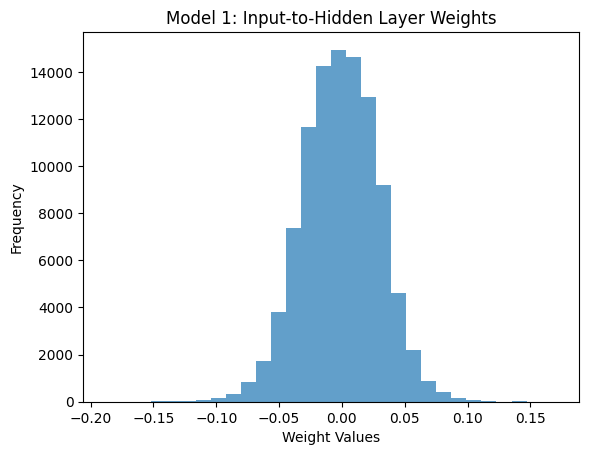

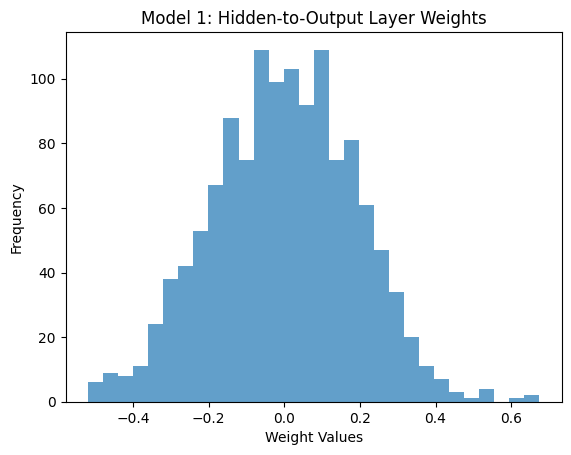

Model 2 Weight Histograms (48 Neurons, 20% Dropout, L2 Regularization)


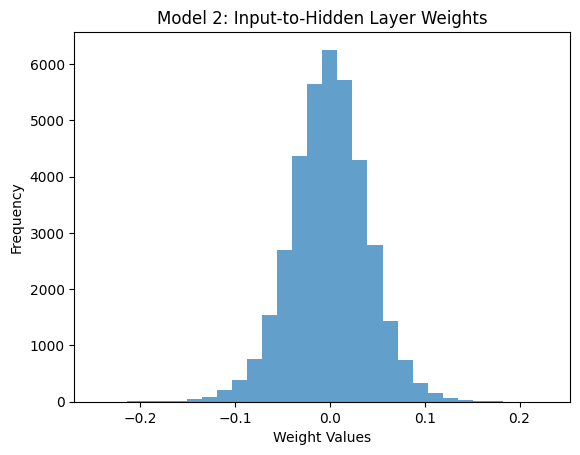

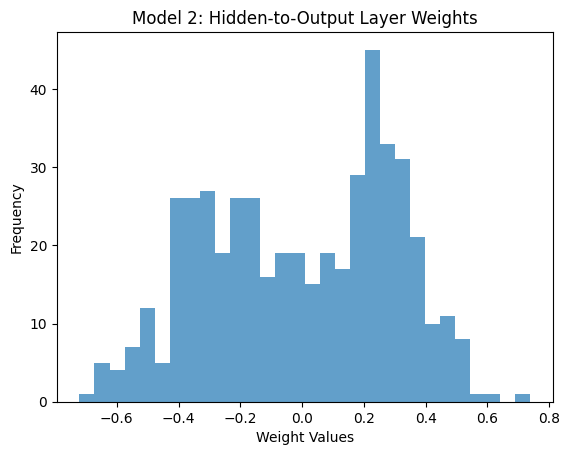

In [ ]:
def plot_weight_histogram(model, layer_name, title):
    weights = getattr(model, layer_name).weight.detach().cpu().numpy().flatten()
    plt.hist(weights, bins=30, alpha=0.7)
    plt.title(title)
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.show()


print("Model 1 Weight Histograms (128 Neurons, No Dropout)")
plot_weight_histogram(model1, 'hidden', "Model 1: Input-to-Hidden Layer Weights")
plot_weight_histogram(model1, 'output', "Model 1: Hidden-to-Output Layer Weights")


print("Model 2 Weight Histograms (48 Neurons, 20% Dropout, L2 Regularization)")
plot_weight_histogram(model2, 'hidden', "Model 2: Input-to-Hidden Layer Weights")
plot_weight_histogram(model2, 'output', "Model 2: Hidden-to-Output Layer Weights")

# <div style="text-align: center; font-family: Arial, sans-serif; font-size: 24px; color: #333; background-color: #d0e7ff; padding: 10px; border-radius: 8px;">Part 3</div>


[I 2024-11-09 18:20:23,636] A new study created in memory with name: no-name-11376f15-6bc6-4cec-b3f4-41169cbab212
<ipython-input-9-997a4ab3d628>:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-11-09 18:25:23,125] Trial 0 finished with value: 0.19400110113611227 and parameters: {'learning_rate': 0.0013681883032918318, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.19400110113611227.
[I 2024-11-09 18:30:19,174] Trial 1 finished with value: 0.19415077885219664 and parameters: {'learning_rate': 0.0013372096835831122, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.19400110113611227.
[I 2024-11-09 18:35:18,890] Trial 2 finished with value: 0.3205665647784975 and parameters: {'learning_rate': 0.006159097335994819, 'optimizer': 'RMSprop'}. Best

Best trial:
  Learning Rate: 0.001956947125839603
  Optimizer: NAdam
  Test Accuracy: 87.75%

Training final model with best parameters: NAdam, learning rate: 0.001956947125839603
Final Test Accuracy with best configuration: 88.05%


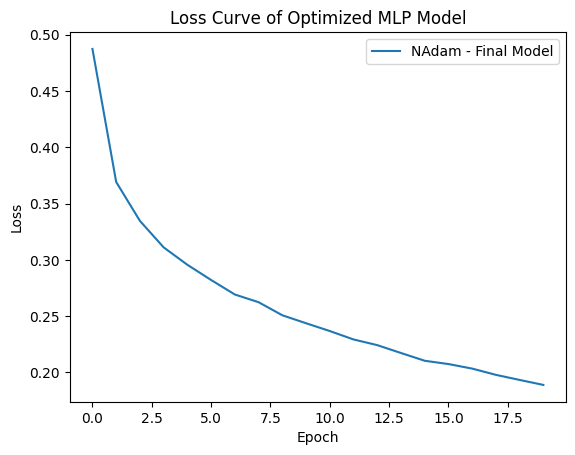

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import optuna

batch_size = 64
num_epochs = 20

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(28*28, 100)
        self.output = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

def train_model(model, optimizer, criterion, num_epochs=num_epochs):
    model.train()
    loss_history = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
    return loss_history

def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total

def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "NAdam", "RMSprop"])

    model = MLP()
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == "NAdam":
        optimizer = optim.NAdam(model.parameters(), lr=learning_rate)
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

    loss_history = train_model(model, optimizer, criterion)
    final_loss = loss_history[-1]
    accuracy = evaluate_model(model)
    trial.set_user_attr("accuracy", accuracy)
    return final_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best trial:")
trial = study.best_trial
print(f"  Learning Rate: {trial.params['learning_rate']}")
print(f"  Optimizer: {trial.params['optimizer']}")
print(f"  Test Accuracy: {trial.user_attrs['accuracy']:.2f}%")

best_learning_rate = trial.params['learning_rate']
best_optimizer_name = trial.params['optimizer']
print(f"\nTraining final model with best parameters: {best_optimizer_name}, learning rate: {best_learning_rate}")

model = MLP()
criterion = nn.CrossEntropyLoss()
if best_optimizer_name == "Adam":
    optimizer = optim.Adam(model.parameters(), lr=best_learning_rate)
elif best_optimizer_name == "NAdam":
    optimizer = optim.NAdam(model.parameters(), lr=best_learning_rate)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=best_learning_rate)

loss_history = train_model(model, optimizer, criterion)
final_accuracy = evaluate_model(model)
print(f"Final Test Accuracy with best configuration: {final_accuracy:.2f}%")

plt.plot(loss_history, label=f"{best_optimizer_name} - Final Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve of Optimized MLP Model")
plt.legend()
plt.show()